In [1]:
# 📦 Step 1: Install necessary packages (only once per environment)
%pip install xarray netCDF4 matplotlib cartopy --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
# 📚 Step 2: Import libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Optional: To suppress scientific notation in plots
np.set_printoptions(suppress=True)

In [6]:
import pandas as pd

df = pd.read_csv('../data/TerraClimate/terraclimate_ppt_MOC_2010.csv')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df.head(12)

,"latitude[unit=""degrees_north""]","longitude[unit=""degrees_east""]","ppt[unit=""mm""]"
time,,,
2010-01-01 00:00:00+00:00,-16.73,-43.87,328.0
2010-02-01 00:00:00+00:00,-16.73,-43.87,211.0
2010-03-01 00:00:00+00:00,-16.73,-43.87,2797.0
2010-04-01 00:00:00+00:00,-16.73,-43.87,252.0
2010-05-01 00:00:00+00:00,-16.73,-43.87,665.0
2010-06-01 00:00:00+00:00,-16.73,-43.87,0.0
2010-07-01 00:00:00+00:00,-16.73,-43.87,0.0
2010-08-01 00:00:00+00:00,-16.73,-43.87,0.0
2010-09-01 00:00:00+00:00,-16.73,-43.87,55.0


# **Validação dos Dados de Preciptação do TerraClima**

## **Etapa 1 — Agregar o INMET para escala mensal**
> Você deve transformar os dados diários do INMET em precipitação total mensal, para compará-los diretamente ao TerraClimate.

In [ ]:
import pandas as pd

In [7]:
# Carrega os dados diários do INMET
df_inmet = pd.read_csv('../data/processed/chuva_moc.csv')

In [8]:
df_inmet.head()

,data,precipitacao_mm,temp_media,umidade_media
0,2003-01-01,7.0,22.8,89.3
1,2003-01-02,11.2,23.0,89.8
2,2003-01-03,7.8,22.4,93.1
3,2003-01-04,52.2,24.1,81.8
4,2003-01-05,20.8,23.0,87.1


In [ ]:
df_inmet['data'] = pd.to_datetime(df_inmet['data'])
# Filtrar apenas os dados de janeiro de 2014
janeiro_2014 = df_inmet[
    (df_inmet['data'].dt.year == 2014) & (df_inmet['data'].dt.month == 1)
]

# Visualizar os dados de precipitação nesse período
print(janeiro_2014[['data', 'precipitacao_mm']])

           data  precipitacao_mm
3511 2014-01-01              0.0
3512 2014-01-02              0.0
3513 2014-01-03              0.0
3514 2014-01-04              0.0
3515 2014-01-05              0.0
3516 2014-01-06              0.0
3517 2014-01-07              0.0
3518 2014-01-08              0.0
3519 2014-01-09              0.0
3520 2014-01-10              0.6
3521 2014-01-11              0.0
3522 2014-01-12              0.0
3523 2014-01-13              0.0
3524 2014-01-14              0.0
3525 2014-01-15              0.0
3526 2014-01-16              0.0
3527 2014-01-17              0.0
3528 2014-01-18              0.0
3529 2014-01-19              1.4
3530 2014-01-20              0.8
3531 2014-01-21              0.6
3532 2014-01-22              4.6
3533 2014-01-23              0.0
3534 2014-01-24             15.6
3535 2014-01-25              0.0
3536 2014-01-26              0.0
3537 2014-01-27              0.0
3538 2014-01-28              0.0
3539 2014-01-29              0.0
3540 2014-

In [37]:
janeiro_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 3511 to 3541
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             31 non-null     datetime64[ns]
 1   precipitacao_mm  31 non-null     float64       
 2   temp_media       31 non-null     float64       
 3   umidade_media    31 non-null     float64       
 4   month            31 non-null     period[M]     
dtypes: datetime64[ns](1), float64(3), period[M](1)
memory usage: 1.5 KB


In [38]:
total_janeiro_2014 = janeiro_2014['precipitacao_mm'].sum()
print(f'Total de precipitação em janeiro de 2014: {total_janeiro_2014:.2f} mm')

Total de precipitação em janeiro de 2014: 23.60 mm


In [39]:
# Filtrar apenas os dados de novembro de 2014
novembro_2014 = df_inmet[
    (df_inmet['data'].dt.year == 2014) & (df_inmet['data'].dt.month == 11)
]

# Visualizar os dados de precipitação nesse período
print(novembro_2014[['data', 'precipitacao_mm']])

           data  precipitacao_mm
3815 2014-11-01              0.0
3816 2014-11-02              0.0
3817 2014-11-03              0.0
3818 2014-11-04              0.0
3819 2014-11-05              0.0
3820 2014-11-06              0.0
3821 2014-11-07              0.0
3822 2014-11-08              0.0
3823 2014-11-09              1.0
3824 2014-11-10             27.2
3825 2014-11-11             19.6
3826 2014-11-12              0.0
3827 2014-11-13              3.0
3828 2014-11-14              6.4
3829 2014-11-15             31.0
3830 2014-11-16              0.8
3831 2014-11-17              0.0
3832 2014-11-18              0.0
3833 2014-11-19              0.0
3834 2014-11-20              0.0
3835 2014-11-21              0.0
3836 2014-11-22              0.0
3837 2014-11-23              0.0
3838 2014-11-24              1.6
3839 2014-11-25             20.2
3840 2014-11-26              5.4
3841 2014-11-27              1.0
3842 2014-11-28              0.0
3843 2014-11-29              0.0
3844 2014-

In [40]:
total_novembro_2014 = novembro_2014['precipitacao_mm'].sum()
print(f'Total de precipitação em janeiro de 2014: {total_novembro_2014:.2f} mm')

Total de precipitação em janeiro de 2014: 117.20 mm


In [9]:
# Converter e agrupar
df_inmet['data'] = pd.to_datetime(df_inmet['data'])
df_inmet['month'] = df_inmet['data'].dt.to_period('M')
df_mensal = df_inmet.groupby('month')['precipitacao_mm'].sum().reset_index()
df_mensal['month'] = df_mensal['month'].dt.to_timestamp()
df_mensal = df_mensal.rename(columns={'month': 'date', 'precipitacao_mm': 'ppt_inmet'})

In [14]:
df_mensal.head(12)

,date,ppt_inmet
0,2003-01-01,158.4
1,2003-02-01,23.4
2,2003-03-01,37.2
3,2003-04-01,3.2
4,2003-05-01,5.2
5,2003-06-01,0.0
6,2003-07-01,0.0
7,2003-08-01,9.2
8,2003-09-01,0.2
9,2003-10-01,49.2


## **Etapa 2 — Carregar os dados do TerraClimate**

In [12]:
df_terra = pd.read_csv('../data/TerraClimate/ppt_data/ppt_moc_2003_2024.csv')
df_terra['date'] = pd.to_datetime(df_terra['date'])

In [15]:
df_terra.head(12)

,date,ppt
0,2003-01-01 00:00:00+00:00,2399.0
1,2003-02-01 00:00:00+00:00,338.0
2,2003-03-01 00:00:00+00:00,515.0
3,2003-04-01 00:00:00+00:00,74.0
4,2003-05-01 00:00:00+00:00,76.0
5,2003-06-01 00:00:00+00:00,0.0
6,2003-07-01 00:00:00+00:00,0.0
7,2003-08-01 00:00:00+00:00,181.0
8,2003-09-01 00:00:00+00:00,8.0
9,2003-10-01 00:00:00+00:00,584.0


## **Etapa 3 — Juntar os dois conjuntos**

In [ ]:
print(df_terra['date'].dtype)
print(df_mensal['date'].dtype)

datetime64[ns, UTC]
datetime64[ns]


In [18]:
# Remove timezone se houver
df_terra['date'] = df_terra['date'].dt.tz_localize(None)

In [19]:
# Merge pelos meses em comum
df_comparacao = pd.merge(df_terra, df_mensal, on='date', how='inner')

In [20]:
df_comparacao.head()

,date,ppt,ppt_inmet
0,2003-01-01,2399.0,158.4
1,2003-02-01,338.0,23.4
2,2003-03-01,515.0,37.2
3,2003-04-01,74.0,3.2
4,2003-05-01,76.0,5.2


## **Etapa 4 — Análise de correlação e plot**

In [ ]:
# Remove timezone se houver
df_terra['date'] = df_terra['date'].dt.tz_localize(None)

Correlação Pearson: 0.9094101016441914


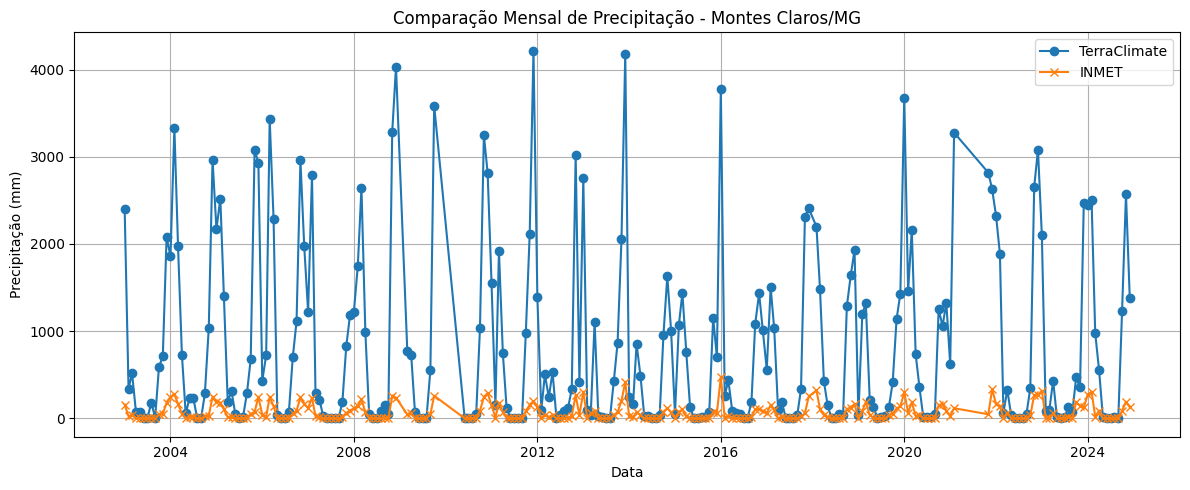

In [21]:
# Correlação
print("Correlação Pearson:", df_comparacao['ppt'].corr(df_comparacao['ppt_inmet']))

# Plot comparativo
plt.figure(figsize=(12, 5))
plt.plot(df_comparacao['date'], df_comparacao['ppt'], label='TerraClimate', marker='o')
plt.plot(df_comparacao['date'], df_comparacao['ppt_inmet'], label='INMET', marker='x')
plt.title('Comparação Mensal de Precipitação - Montes Claros/MG')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Caminho de saída (ajuste se necessário)
output_path = '../data/processed/ppt_comparacao_terra_inmet.csv'

# Salvar o DataFrame em CSV
df_comparacao.to_csv(output_path, index=False)

print(f" Arquivo salvo em: {output_path}")

 Arquivo salvo em: ../data/processed/ppt_comparacao_terra_inmet.csv


---

In [26]:
import xarray as xr

ds = xr.open_dataset('../data/TerraClimate/TerraClimate_ppt_2014.nc')
var = ds['ppt']
print(var.attrs)
print(var.isel(time=0))

{'units': 'mm', 'description': 'Accumulated Precipitation', 'long_name': 'precipitation_amount', 'standard_name': 'precipitation_amount', 'dimensions': 'lon lat time', 'grid_mapping': 'crs', 'coordinate_system': 'WGS84,EPSG:4326'}
<xarray.DataArray 'ppt' (lat: 4320, lon: 8640)> Size: 299MB
[37324800 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 35kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float64 69kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
    time     datetime64[ns] 8B 2014-01-01
Attributes:
    units:              mm
    description:        Accumulated Precipitation
    long_name:          precipitation_amount
    standard_name:      precipitation_amount
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326


In [27]:
import numpy as np

# Carregar com xarray original
var = ds['ppt']
raw = ds['ppt'].encoding.get('raw_values', None)
print('Raw value example:', raw, '-> scaled:', var.isel(time=0).values)

Raw value example: None -> scaled: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
import xarray as xr
import pandas as pd

# Abrir o arquivo NetCDF de 2014
ds = xr.open_dataset('../data/TerraClimate/TerraClimate_ppt_2014.nc')

# Coordenadas de Montes Claros
lat_moc = -16.73
lon_moc = -43.87

# Selecionar o ponto mais próximo (método 'nearest')
ppt_moc = ds['ppt'].sel(lat=lat_moc, lon=lon_moc, method='nearest')

# Converter para DataFrame
df_ppt_2014 = ppt_moc.to_dataframe().reset_index()

# Salvar (opcional)
df_ppt_2014.to_csv('../data/processed/ppt_moc_2014_from_nc.csv', index=False)

# Visualizar
print(df_ppt_2014)


         time        lat        lon    ppt
0  2014-01-01 -16.729167 -43.854167   24.3
1  2014-02-01 -16.729167 -43.854167   16.0
2  2014-03-01 -16.729167 -43.854167   85.3
3  2014-04-01 -16.729167 -43.854167   49.1
4  2014-05-01 -16.729167 -43.854167    3.2
5  2014-06-01 -16.729167 -43.854167    2.6
6  2014-07-01 -16.729167 -43.854167    0.7
7  2014-08-01 -16.729167 -43.854167    0.1
8  2014-09-01 -16.729167 -43.854167    3.4
9  2014-10-01 -16.729167 -43.854167   95.2
10 2014-11-01 -16.729167 -43.854167  163.1
11 2014-12-01 -16.729167 -43.854167  100.7


In [29]:
# Filtrar dados de 2014
df_2014 = df_comparacao[df_comparacao['date'].dt.year == 2014]

In [31]:
df_2014.head(12)

,date,ppt,ppt_inmet
123,2014-01-01,243.0,23.6
124,2014-02-01,160.0,12.6
125,2014-03-01,853.0,75.4
126,2014-04-01,491.0,34.6
127,2014-05-01,32.0,2.0
128,2014-06-01,26.0,1.8
129,2014-07-01,7.0,0.0
130,2014-08-01,1.0,0.0
131,2014-09-01,34.0,2.8
132,2014-10-01,952.0,74.0
